In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
# Load Titanic dataset 
df = pd.read_csv('./UCI_heart.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, restecg, thalach, exang, Heart_problem, Age_Quantile]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            303 non-null    int64 
 1   sex            303 non-null    int64 
 2   trestbps       303 non-null    int64 
 3   chol           303 non-null    int64 
 4   fbs            303 non-null    int64 
 5   restecg        303 non-null    int64 
 6   thalach        303 non-null    int64 
 7   exang          303 non-null    int64 
 8   Heart_problem  303 non-null    int64 
 9   Age_Quantile   303 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.8+ KB


In [6]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

NameError: name 'df' is not defined

Age_Quantile_Q1    82
Age_Quantile_Q2    80
Age_Quantile_Q3    70
Age_Quantile_Q4    71
dtype: int64
Age_Quantile_Q1    27.062706
Age_Quantile_Q2    26.402640
Age_Quantile_Q3    23.102310
Age_Quantile_Q4    23.432343
dtype: float64


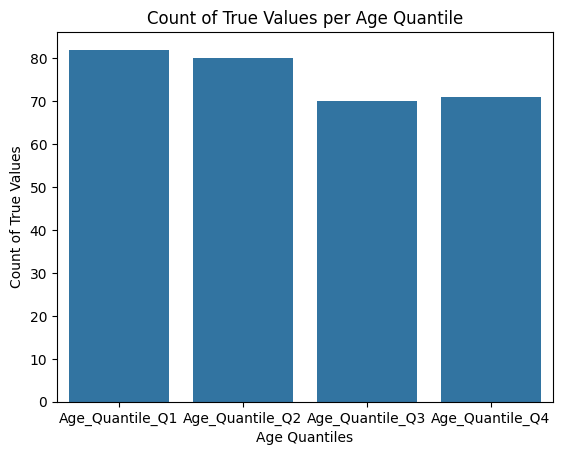

In [ ]:
# Find how many true values are in Age_Quantile_Q1-4 
df_obj= pd.get_dummies(df_obj)
print(df_obj.sum())

# Find average number of true values
print((df_obj.sum() / len(df_obj)) * 100)

# Plot the counts for each Age Quantile column
sns.barplot(x=df_obj.sum().index, y=df_obj.sum().values)
plt.xlabel('Age Quantiles')
plt.ylabel('Count of True Values')
plt.title('Count of True Values per Age Quantile')
plt.show()

In [ ]:
attr = df.drop(columns=["age", "trestbps", "chol", "thalach", "Heart_problem"])
attr = pd.get_dummies(attr)

target = df['Heart_problem']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[32 11]
 [11 22]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        43
           1       0.67      0.67      0.67        33

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76



In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);